In [445]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from IPython.display import display


In [446]:
data = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'

In [447]:
# !wget $data

In [448]:
df = pd.read_csv('CreditScoring.csv')

In [449]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [450]:
df.columns = df.columns.str.lower()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [451]:
status_values = {1: 'ok', 2: 'default', 0: 'unk'}
df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [452]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [453]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [454]:
df.describe().round()
# This will define and describe the DF for us

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [455]:
df.income.max()

99999999

In [456]:
# We are assuming the the 999999999 is the missing value so we replace it with NaN
df.income.replace(to_replace=99999999, value=np.nan).max()

959.0

In [457]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [458]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [459]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [460]:
# Since there is only 1 Unknown, we can just remove it from our DF. It will not effect us
df = df[df.status != 'unk'].reset_index(drop=True)

In [461]:
# split up the Df into train, val, test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [462]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [463]:
# Let convert the statuses to 1 and 0

y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [464]:
del df_train['status']
del df_val['status']
del df_test['status']

Decision Trees

In [465]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer


In [466]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [467]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [468]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [469]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [470]:
val_dicts = df_val.fillna(0).to_dict(orient='records')

In [471]:
X_val = dv.transform(val_dicts)

In [472]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [473]:
roc_auc_score(y_val, y_pred)

0.6534262914436559

In [474]:
y_pred = dt.predict_proba(X_train)[:, 1]

In [475]:
roc_auc_score(y_train, y_pred)

1.0

This is an example of overfitting above. It gives us a perfect score on the df_train set because it memorized it.

Lets try setting the max depth of our tree and see what happens

In [476]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [477]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [478]:
roc_auc_score(y_val, y_pred)

0.7389079944782155

In [479]:
y_pred_train = dt.predict_proba(X_train)[:, 1]

In [480]:
roc_auc_score(y_train, y_pred_train)

0.7761016984958594

In [481]:
# from sklearn.tree import export_text
# This will give us a view of the tree and show what conditions were learned

In [482]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



Decision Tree Learning Algo


In [483]:
 data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [484]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [485]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [486]:
T = 4000
# from IPython.display import display

df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets >= T]
display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_right.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64


In [487]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



In [488]:
 data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [489]:
df_example.sort_values('debt')
# This shows that our splits can be 500, 1000, 2000

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [490]:
Ts = [500, 1000, 2000]

In [491]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [492]:
for feature, Ts in thresholds.items():
    print('############')
    print(feature)
    for T in Ts:
        print( T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print()

############
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

############
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64



Decision Tree parameter tuning


In [493]:
# Lets begin with max depth
# None means no restriction
for d in [1 ,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' %(d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.754
  10 -> 0.695
  15 -> 0.669
  20 -> 0.662
None -> 0.651


The above shows that 4-6 are the best for depth


In [494]:
# Now we will take the depths of 4,5,6 and iterate over the other parameters
# min_samples_leaf

#       print('%4s, %3d -> %.3f' %(d, s, auc))

scores = []
for d in [4, 5, 6, 10, 20, 100, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, round(auc, 3)))


In [495]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])


In [496]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
31,10.0,15,0.791
58,NaN,15,0.787
40,20.0,15,0.786
49,100.0,15,0.786
22,6.0,15,0.785
...,...,...,...
46,100.0,2,0.679
27,10.0,1,0.678
36,20.0,1,0.655
54,NaN,1,0.652


In [497]:
# make a pivot table
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot

auc                                          
max_depth           NaN  4.0    5.0    6.0    10.0   20.0   100.0
min_samples_leaf                                                 
1                 0.652  0.761  0.767  0.759  0.678  0.655  0.644
2                 0.683  0.761  0.766  0.759  0.702  0.693  0.679
5                 0.717  0.761  0.768  0.762  0.726  0.722  0.715
10                0.760  0.761  0.762  0.778  0.771  0.765  0.766
15                0.787  0.764  0.772  0.785  0.791  0.786  0.786
20                0.782  0.761  0.774  0.774  0.784  0.782  0.783
100               0.779  0.756  0.763  0.776  0.779  0.780  0.779
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

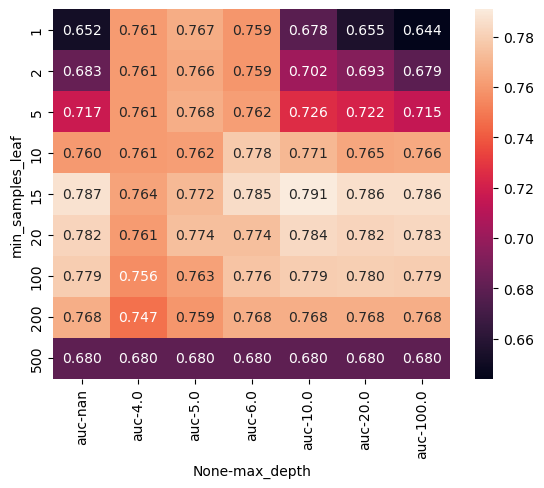

In [498]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [499]:
# Now we define the final Model with our values
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [500]:
from sklearn.ensemble import RandomForestClassifier

In [501]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [502]:
y_pred = rf.predict_proba(X_val)[:,1]


In [503]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [504]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, round(auc,4)))

In [505]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

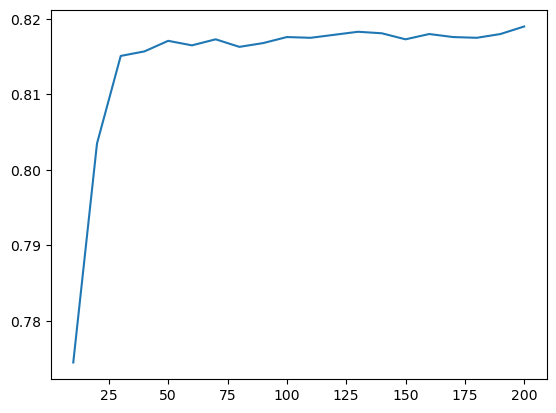

In [506]:
plt.plot(df_scores.n_estimators, df_scores.auc)
# this shows that after 50 experts, we reach a peak so we do not need to train more for such a small increase

In [507]:
scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, round(auc,4)))

In [508]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,n_estimators,auc
35,10,160,0.8252
39,10,200,0.8249
37,10,180,0.8248
36,10,170,0.8246
38,10,190,0.8245


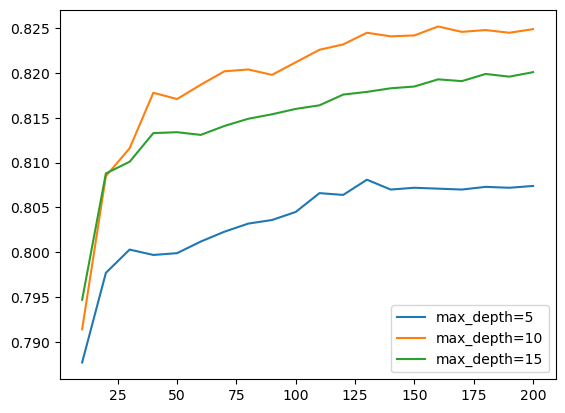

In [509]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
    
plt.legend()

In [510]:
max_depth = 10


In [511]:
scores = []
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, round(auc,4)))

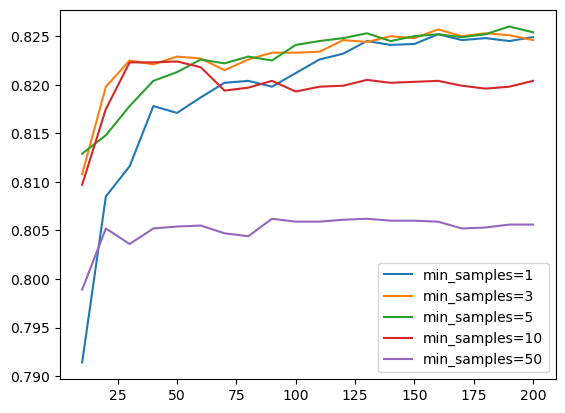

In [512]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])
df_scores.sort_values(by='auc', ascending=False).head()

for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='min_samples=%s' % s)
    
plt.legend()

In [513]:
min_samples_leaf = 3

In [514]:
n_estimators = 100

In [515]:
scores = []

rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
auc
# scores.append((s, n, round(auc,4)))

0.8233361991717324

In [516]:
# max_features 
# This is another parameter that we can use to fine tune our model. Controls how many features will given to 
# each tree in the random forest

In [517]:
# n_jobs
# controls how many trees we can train at once. Allows us to use all the processor

In [518]:
# The trees we trained above are independent. 
# Boosting is the method of training models sequentially which allows each model to help learn from the other trees. 

Boosting - XG boost


In [519]:
!pip install xgboost


In [520]:
import xgboost as xgb

In [521]:
# To train and evaluate the model, we need to wrap our train and validation data into a special data structure from XGBoost which is called DMatrix.\
# This data structure is optimized to train xgboost models faster.
# DMatrix


In [522]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [523]:
xgb_params = {
#     the learning rate??/
    'eta': 0.3, 
    'max_depth': 6,
#     similiar to min_samples_leaf
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [524]:
y_pred = model.predict(dval)

In [525]:
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [526]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [527]:
xgb_params = {
#     the learning rate??/
    'eta': 0.3, 
    'max_depth': 6,
#     similiar to min_samples_leaf
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
# its not very easy to take the data below so we can access it and use it. 
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [528]:
%%capture output
# this will allow us to capture the output. Line Magics must be at the beginning of the cell

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

In [529]:
output_string = (output.stdout)

In [530]:
output_string

'[0]\ttrain-auc:0.86730\tval-auc:0.77938\n[5]\ttrain-auc:0.93086\tval-auc:0.80858\n[10]\ttrain-auc:0.95447\tval-auc:0.80851\n[15]\ttrain-auc:0.96554\tval-auc:0.81334\n[20]\ttrain-auc:0.97464\tval-auc:0.81729\n[25]\ttrain-auc:0.97953\tval-auc:0.81686\n[30]\ttrain-auc:0.98579\tval-auc:0.81543\n[35]\ttrain-auc:0.99011\tval-auc:0.81206\n[40]\ttrain-auc:0.99421\tval-auc:0.80922\n[45]\ttrain-auc:0.99548\tval-auc:0.80842\n[50]\ttrain-auc:0.99653\tval-auc:0.80918\n[55]\ttrain-auc:0.99765\tval-auc:0.81114\n[60]\ttrain-auc:0.99817\tval-auc:0.81172\n[65]\ttrain-auc:0.99887\tval-auc:0.80798\n[70]\ttrain-auc:0.99934\tval-auc:0.80870\n[75]\ttrain-auc:0.99965\tval-auc:0.80555\n[80]\ttrain-auc:0.99979\tval-auc:0.80549\n[85]\ttrain-auc:0.99988\tval-auc:0.80374\n[90]\ttrain-auc:0.99993\tval-auc:0.80409\n[95]\ttrain-auc:0.99996\tval-auc:0.80548\n[100]\ttrain-auc:0.99998\tval-auc:0.80509\n[105]\ttrain-auc:0.99999\tval-auc:0.80629\n[110]\ttrain-auc:1.00000\tval-auc:0.80637\n[115]\ttrain-auc:1.00000\tval-au

In [531]:
output_list = []
for n in output_string.strip().split('\n'):
    if n == '':
        continue
    num, train, val = n.split('\t')
    num = num.strip('[]')
    train_key, train_auc = train.split(':')
    val_key, val_auc = val.split(':')
    output_list.append((int(num), train_key, float(train_auc), val_key, float(val_auc)))

In [532]:
def parse_xgb_output(output):
    results = []
    
    for line in output.strip().split('\n'):
        num, train, val = line.split('\t')
        it = int(num.strip('[]'))
        train = float(train.split(':')[1])
        val = float(val.split(':')[1])
        
        results.append((it, train, val))
    
    columns = ['num_of_iterations', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    
    return df_results

        
        
    

In [533]:
df_score = parse_xgb_output(output_string)

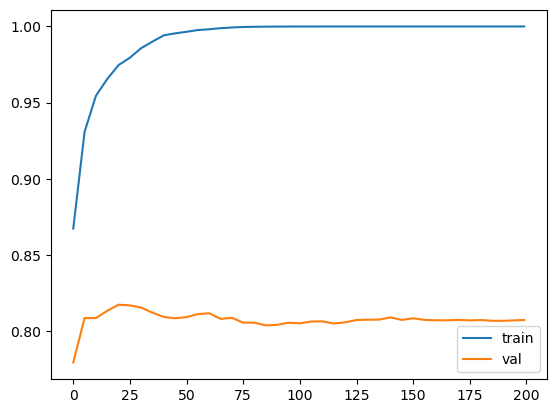

In [534]:
plt.plot(df_score.num_of_iterations	, df_score.train_auc, label='train')
plt.plot(df_score.num_of_iterations	, df_score.val_auc, label='val')
plt.legend()

We can also use evals_result parameter to get the results from the xgb.train

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

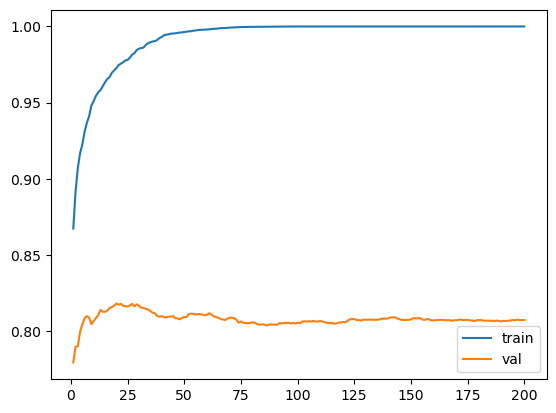

In [535]:
evals_result = {}

model = xgb.train(params=xgb_params,
                  dtrain=dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)

columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(evals_result['train'].values())[0]
val_aucs = list(evals_result['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs) + 1),
        train_aucs,
        val_aucs
    )), columns=columns)

plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

Parameter Tuning
- eta
- max_depth
- min_child_weight

In [536]:
scores = {}

In [537]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

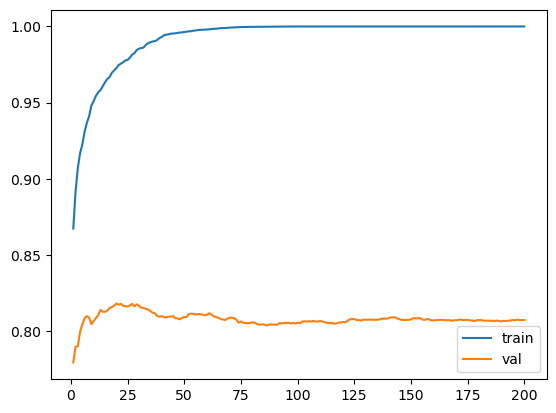

In [538]:
evals_result = {}

model = xgb.train(params=xgb_params,
                  dtrain=dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)

columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(evals_result['train'].values())[0]
val_aucs = list(evals_result['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs) + 1),
        train_aucs,
        val_aucs
    )), columns=columns)

plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

In [539]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output.stdout)
key

In [540]:
scores = {}

In [541]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output.stdout)
key

'eta=0.01'

In [542]:
scores

{'eta=0.01':     num_of_iterations  train_auc  val_auc
 0                   0    0.86730  0.77938
 1                   5    0.87157  0.77925
 2                  10    0.87247  0.78051
 3                  15    0.87541  0.78302
 4                  20    0.87584  0.78707
 5                  25    0.88406  0.79331
 6                  30    0.89027  0.79763
 7                  35    0.89559  0.79914
 8                  40    0.89782  0.79883
 9                  45    0.89983  0.79845
 10                 50    0.90182  0.79697
 11                 55    0.90394  0.79775
 12                 60    0.90531  0.79684
 13                 65    0.90630  0.79616
 14                 70    0.90796  0.79672
 15                 75    0.90955  0.79807
 16                 80    0.91116  0.79976
 17                 85    0.91227  0.80130
 18                 90    0.91368  0.80285
 19                 95    0.91515  0.80390
 20                100    0.91654  0.80499
 21                105    0.91791  0.80534

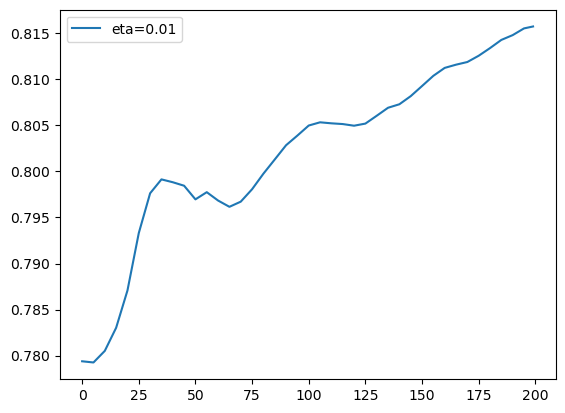

In [543]:
for key, df_score in scores.items():
    plt.plot(df_score.num_of_iterations, df_score.val_auc, label=key)

    
plt.legend()
# We chose the eta values to find the best one.

In [544]:
# best to fine tune them in this order
# 1. ETA
# 2. max_depth
# 3. min_child_weight

In [545]:
scores = {}


In [546]:
%%capture output

# tune max_depth


xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output.stdout)
key

In [547]:
scores.keys()

dict_keys(['max_depth=10'])

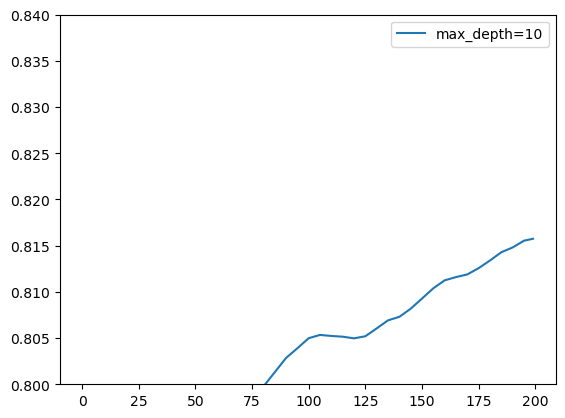

In [548]:
for key, df_score in scores.items():
    plt.plot(df_score.num_of_iterations, df_score.val_auc, label=key)

plt.ylim(0.8, 0.84)
plt.legend()

# best max_depth is 4

In [549]:
# now we tune min_child_width

In [550]:
scores = {}

In [551]:
%%capture output


xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output.stdout)
key

In [552]:
scores.keys()

dict_keys(['min_child_weight=30'])

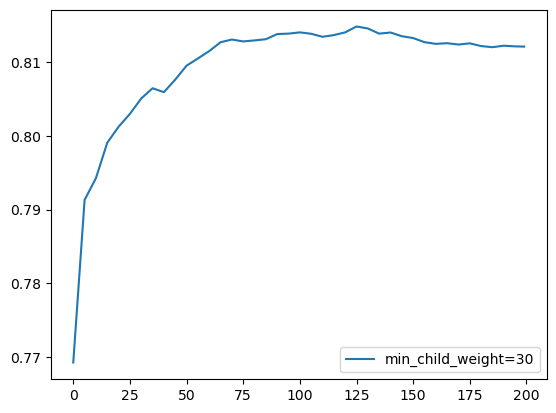

In [553]:
for key, df_score in scores.items():
    plt.plot(df_score.num_of_iterations, df_score.val_auc, label=key)

# plt.ylim(0.8, 0.84)
plt.legend()

# best min_child_width is 10



In [554]:
# And we can also see that the best num_boost_round or iterations is 175

In [555]:
%%capture output


xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175,
                  verbose_eval=5,
                  evals=watchlist)

# key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
# scores[key] = parse_xgb_output(output.stdout)
# key

In [556]:
parse_xgb_output(output.stdout)

,num_of_iterations,train_auc,val_auc
0,0,0.80024,0.75372
1,5,0.83345,0.78078
2,10,0.84800,0.79771
3,15,0.86072,0.80664
4,20,0.86811,0.81146
5,25,0.87558,0.81685
6,30,0.87934,0.82034
7,35,0.88307,0.82127
8,40,0.88574,0.82442
9,45,0.88832,0.82617


In [557]:
# Other useful parameters to look into
# subsample
# colsample_bytree
# lambda
# alpha

Training the final model and choosing whats best for us
- choosing between xgboost, random forest, and decision tree
- training the final model
- saving the model

In [558]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [559]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7848562640769174

In [560]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [561]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [562]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [563]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8309347073212081

In [564]:
# The xgboost is the best 
df_full_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3536,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
3866,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750


In [565]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train.status == 'default').astype(int).values
del df_full_train['status']
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)
features = list(dv.get_feature_names_out())

dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=features)

dtest = xgb.DMatrix(X_test, feature_names=features)

In [566]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8289367577342261